In [164]:
#importing libraries
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import iqr,skew, kurtosis
import statsmodels.api as sm 
import pylab as py 
import seaborn as sns
import matplotlib.pyplot as plt

This data is a reservation data of restaurant which consists of details like gender, day, meal time, number of customers, total bill paid and the tip.

# Part I I - Quantitative variables EDA

The sample statistics are accessed using the quantitative variables, which can be used to paint initial picture of population distribution. The distribution of population is characterised by the central tendency, dispersion, asymmetry, peakedness. In addition to that strength and direction of direct relationship between input variables and outcome variable, outliers, covariance, and correlation are also checked.

In [3]:
tp=pd.read_csv("tips.csv")

In [4]:
tp.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Univariate-Quantitative EDA: 
Exploratory data analysis for quantitative variable majorly evaluation the distribution of variable in a given dataset. To do so, one might be interested in center of mass of data, variance in data, variable relationships, etc.

In [31]:
tp.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Measure of central tendency: 
When we measure the central tendency of a sample, we essentially are trying to identify the "center of mass" of values. In simple terms around what point most of the middle value resides. To measure central tendency arithmetic mean(generally), median and mode is calculated.
Mean: In most of the case arithmetic mean is of interest. By calculating mean, we try to find out the number which can smooth the fluctuation in the dataset.Two important points to note here, firstly, the mean tell more about the whole data set than individual values and secondly, mean is directly and highly influenced by the outlier values.
Median: This is the point which divides the data set into two equal half such that one set of the values will always be smaller than the median and other half will be bigger than the median. This means that median is unaffected by the outliers and hence better measure of central tendencies in case the data is highly skewed (asymmetric distribution). In case of normal distribution the mean and median values coincides.

Mode: Mode measure the most frequent values from the dataset. Mode is more useful when the interest is in knowing which categories are more frequent and is of little use in case of continuous dataset (reason → multi-modal distribution)



In [72]:
#Measure of central tendency
print("Mean of total bill:",tp.total_bill.mean())
print("Median of total bill:",tp.total_bill.median())
print("Mode of total bill:",tp.total_bill.mode())
print('------------------------------------------------')
print("Mean of tip:",tp.tip.mean())
print("Median of tip:",tp.tip.median())
print("Mode of tip:",tp.tip.mode())
print('------------------------------------------------')
print("Mean of size:",tp['size'].mean())
print("Median of size:",tp['size'].median())
print("Mode of size:",tp['size'].mode())

Mean of total bill: 19.785942622950824
Median of total bill: 17.795
Mode of total bill: 0    13.42
dtype: float64
------------------------------------------------
Mean of tip: 2.9982786885245902
Median of tip: 2.9
Mode of tip: 0    2.0
dtype: float64
------------------------------------------------
Mean of size: 2.569672131147541
Median of size: 2.0
Mode of size: 0    2
dtype: int64


In the measure of central tendency, Let's look at the totall_bill variable. The average bill paid by 244 reservations is 19.79 Euro. The median is 17.95 Euro, which is less than mean, which suggests the data is slightly positively skewed. This we will confirm using, IQR, histograms and boxplots and histograms later as well.

Mode of total_bill=13.42 Euro, which means that this value is most occuring value for the variable total_bill. To find out how many times the value has appeared, check code below.

In [45]:
tp.loc[tp['total_bill']==13.42]

,total_bill,tip,sex,smoker,day,time,size
121,13.42,1.68,Female,No,Thur,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2


In [84]:
d={}
for i in tp['total_bill']:
    if i in d.keys():
        d[i]+=1
    else:
        d[i]=1
#print(d)
print(max(d.values()))
r_d = dict(map(reversed, d.items()))
print(r_d[max(d.values())])

3
13.42


Measure of dispersion: Measure of dispersion/spread describes the variance in the data, which means how far away from mean, the data points are spread . In association with measure of central tendency, the measure of variance is of great value. It shows how well the measure of central tendency is representative of the data. 

Range: It is one of the basic and most intuitive measure of spread. Range is the difference between lowest and highest value from the data set which defines the boundary of the data. It has limited use unless there are some critical boundary violation check is of interest.

Variance: To represent the spread of data, variance uses squared absolute deviation ,divided by the sample size. As a result only positive number is achieved. 
If datapoints is spread out wide → Variance will be higher (large number)
If datapoints are close to mean →Variance will be smaller (small number).
However, variance can be tricky in presence of outliers. Firstly, due to squared absolute deviation outliers/extreme values gets more weight. Secondly, the squared unit causes variance to appear arbitrary number and hard to interpret.

Standard variance/deviation: The second problem of variance is solved by taking the square root of variance and result is standard deviation. Low standard deviation means that datapoints are closer to the mean and high standard deviation signify the data points are spread across the wide range.

Interquartile Range: Similar to idea of median, the data set is first divided into 4 quartiles and difference between third and first quartile is calculated. Quartiles are interesting measure as they are robust to outliers/skewed data unlike variance, standard deviation and mean.



In [129]:
#Measure of Dispersion
print("variance of total bill:",round(st.variance(tp['total_bill']),2))
print("sd of total bill:",round(st.stdev(tp['total_bill']),2))
print("Range of total bill:",tp.total_bill.min() - tp.total_bill.max())
print("Min and Max of total bill:",tp.total_bill.min(),'-',tp.total_bill.max())
print("IQR:",round(iqr(tp['total_bill']),2))
tp.quantile([.25, .5, .75, 1], axis = 0)


variance of total bill: 79.25
sd of total bill: 8.9
Range of total bill: -47.74
Min and Max of total bill: 3.07 - 50.81
IQR: 10.78


,total_bill,tip,size
0.25,13.3475,2.0000,2.0
0.50,17.7950,2.9000,2.0
0.75,24.1275,3.5625,3.0
1.00,50.8100,10.0000,6.0


In [107]:
#To cross verify the above data
tp.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Let's take a look at what we can understand from the dispersion and if it supports the results obtained from the central tendency.
First of all  q2-q1 is smaller than q3-q2; which supports the positively skewed data observation.

Skewness and Kurtosis: 
Skewness and kurtosis describes the given data distribution's asymmetry (skewness) and peakiness (kurtosis), in context to Gaussian distribution or the bell curve.

In [134]:
#Measure of Dispersion
print("skewness of total bill:",round(skew(tp['total_bill']),2))
print("Kurtosis of total bill:",round(kurtosis(tp['total_bill']),2))


skewness of total bill: 1.13
Kurtosis of total bill: 1.17


1. The skewness of total_bill is 1.13 which is greater than 0, this also suggest that data is positively skewed.
2. Kurtosis value is 1.17 , which suggest that the data is most data is around mean.


# Univariate-Graphical EDA

The quantitative analysis become stronger the the graphical representation, which support in interpreatation.
Univariate-Graphical EDA:
Histograms: One of the quickest and most popular way to access the distribution of data is histograms. Below is the histogram of tip from the tips dataset. As can be seen from the histogram the data is positively skewed.

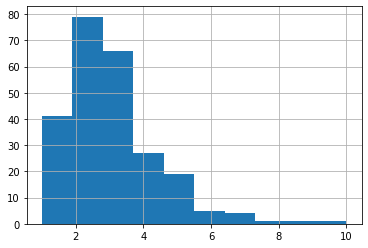

In [65]:
tp['tip'].hist(bins=10)

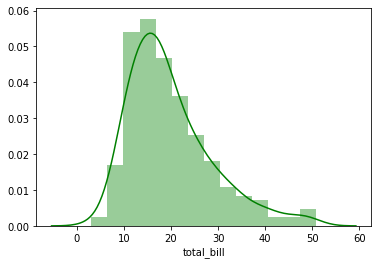

In [150]:
sns.distplot(tp['total_bill'],color="g")

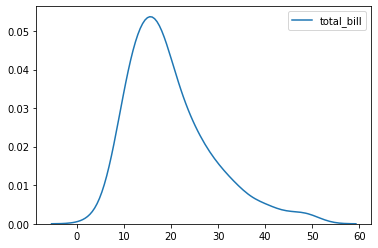

In [158]:
sns.kdeplot(tp["total_bill"])

With the above graphs it is clear that the variable (total_bill) data is positively skewed and is slightly kurtotic which is known and leptokurtic

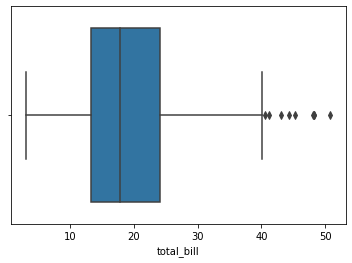

In [113]:
sns.boxplot(x=tp['total_bill'], data=tp)

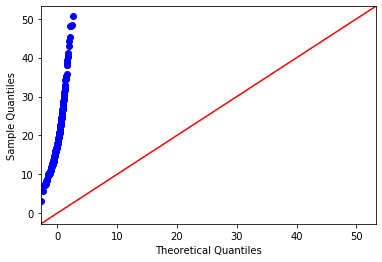

In [161]:
sm.qqplot(tp['total_bill'], line ='45') 
py.show() 
#https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

Correlation: 
Correlation evaluates the direction as well as strength of a relationship between continuous variables. Correlation coefficient can range from -1 to +1, which signifies strong negative to strong positive relation between the variables. Correlation=0, suggests that two variables are independent of each other. A positive correlation point towards the positive relationship between two variables, which means if one variable a changes the second variable also changes is same direction(increase or decrease).

In [162]:
tp.corr(method ='pearson') 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Cross-correlation matrix


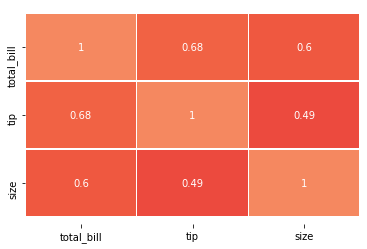

In [165]:
print("Cross-correlation matrix")
corrMatrix=tp.corr()
x=sns.heatmap(corrMatrix, annot=True,linewidths=.5,vmin=-2,vmax=2,cbar=False)
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In the above matrix one can observe that diagonal values are 1, which suggest absolute relationship. This makes sense in a way that every variable will have same direction and magnitude of change with itself. Importatn point worth noting is total_bill and tips are sharing postive and comparativelly strong relation. 

Eventhough this is logical that when the billing is more, chances of getting tips are also more. However, the causation reasons are not always apparent and should be investigated. Additionally, in modelling magnitude of relationship plays vital role so should be treated appropiately.

# Multivariate-Graphical EDA:

Scatter plots: Scatter plots are generally plot between the input variable (x-axis) vs outcome variable (y-axis). Scatter plots visually gives idea of how two variables are changes with respect to each other. Additionally, one can also add categories which can be represented by various colours as well as shapes of points.

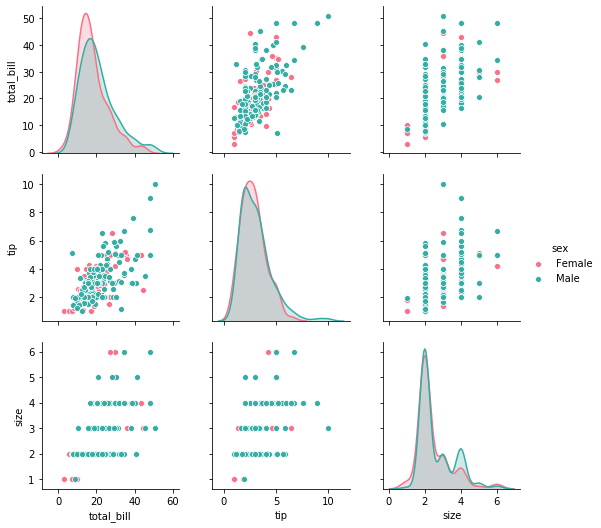

In [185]:
sns.pairplot(tp, hue="sex",palette="husl", size=2.5)


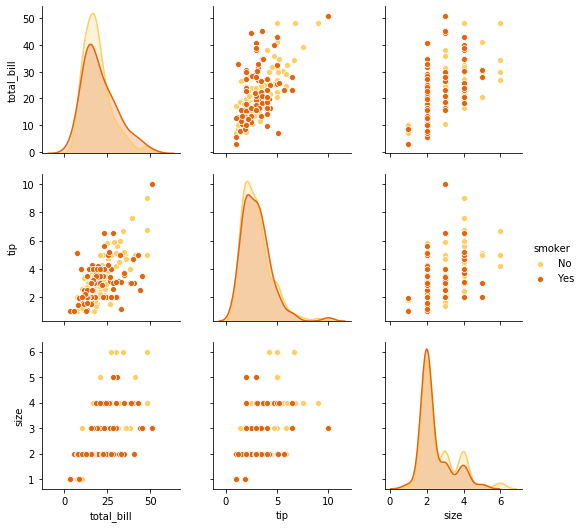

In [195]:
sns.pairplot(tp, hue="smoker",palette="YlOrBr", size=2.5)



In [201]:
sns.distplot(tp["total_bill"], hue="smoker", kind="kde")

TypeError: distplot() got an unexpected keyword argument 'hue'